In [1]:
import pandas as pd


In [2]:
nomes_f = pd.read_json(
    "https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_m = pd.read_json(
    "https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")


In [3]:
nomes = pd.concat([nomes_f, nomes_m])['nome'].to_frame()


In [4]:
import numpy as np
np.random.seed(123)


In [5]:
total_alunos = len(nomes)
total_alunos


400

In [6]:
nomes['id_aluno'] = np.random.permutation(total_alunos)+1


In [7]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']


In [8]:
nomes['dominio'] = np.random.choice(dominios, total_alunos)
nomes['email'] = nomes['nome'].str.lower()+nomes['dominio']
nomes


,nome,id_aluno,dominio,email
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com
...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br
198,ALVARO,383,@servicodoemail.com,alvaro@servicodoemail.com


In [9]:
import html5lib
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos = cursos[0]
cursos.head()


,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [10]:
cursos.rename(columns={'Nome do curso': 'nome_do_curso'}, inplace=True)
cursos.head(5)


,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [11]:
cursos['id'] = cursos.index + 1
cursos.head(5)


,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [12]:
cursos.set_index('id', inplace=True)
cursos.head(5)


,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [13]:
nomes['matriculas'] = np.ceil(
    np.random.exponential(size=total_alunos)*1.5).astype(int)


In [14]:
nomes.matriculas.describe().round(2)


count    400.00
mean       2.14
std        1.51
min        1.00
25%        1.00
50%        2.00
75%        3.00
max        9.00
Name: matriculas, dtype: float64

In [15]:
grupos = nomes.groupby('matriculas')['nome']
grupos.count()
# nomes.matriculas.value_counts()


matriculas
1    183
2    106
3     52
4     23
5     18
6     10
7      4
8      2
9      2
Name: nome, dtype: int64

/home/rosicley/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimen

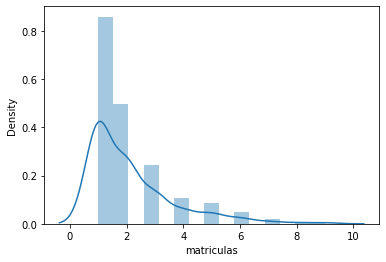

In [16]:
import seaborn as sns
sns.distplot(nomes['matriculas'])


In [17]:
nomes.sample(5)


,nome,id_aluno,dominio,email,matriculas
93,ELIANA,372,@servicodoemail.com,eliana@servicodoemail.com,1
198,ALVARO,383,@servicodoemail.com,alvaro@servicodoemail.com,3
63,MIGUEL,239,@servicodoemail.com,miguel@servicodoemail.com,2
174,DENIS,69,@servicodoemail.com,denis@servicodoemail.com,1
69,REGINALDO,170,@dominiodoemail.com.br,reginaldo@dominiodoemail.com.br,1


In [18]:
cursos


,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


In [19]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    cont = 0
    cursos_aluno = []
    while cont < matriculas:
        curso = np.random.choice(cursos.index, p=prob)
        if(curso not in cursos_aluno):
            todas_matriculas.append([id, curso])
            cursos_aluno.append(curso)
            cont += 1

# for index, row in nomes.iterrows():
#     id = row.id_aluno
#     matriculas = row.matriculas
#     for i in range(matriculas):
#         mat = [id, np.random.choice(cursos.index, p = prob)]
#         todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns=['id_aluno', 'id_cursos'])
matriculas


,id_aluno,id_cursos
0,235,19
1,235,8
2,235,10
3,43,19
4,304,16
...,...,...
850,323,3
851,383,18
852,383,10
853,383,6


In [20]:
matriculas.groupby('id_cursos').count().join(cursos['nome_do_curso']).rename(
    columns={'id_aluno': 'quantidade_alunos'})


,quantidade_alunos,nome_do_curso
id_cursos,,
1,47,Lógica de programação
2,2,Java para Web
3,71,C# para Web
4,9,Ruby on Rails
5,58,Cursos de Python
6,36,PHP com MySql
7,64,.NET para web
8,66,Novas integrações com Java
9,13,TDD com Java


In [21]:
nomes.sample(3)


,nome,id_aluno,dominio,email,matriculas
64,ROBSON,290,@servicodoemail.com,robson@servicodoemail.com,6
31,JOSEFA,103,@servicodoemail.com,josefa@servicodoemail.com,1
145,FRANCIELE,316,@dominiodoemail.com.br,franciele@dominiodoemail.com.br,1


In [22]:
cursos.head()


,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [23]:
matriculas_por_curso = matriculas.groupby('id_cursos').count().join(
    cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_alunos'})


In [24]:
matriculas_por_curso.head()


,quantidade_alunos,nome_do_curso
id_cursos,,
1,47,Lógica de programação
2,2,Java para Web
3,71,C# para Web
4,9,Ruby on Rails
5,58,Cursos de Python


In [25]:
matriculas.head()


,id_aluno,id_cursos
0,235,19
1,235,8
2,235,10
3,43,19
4,304,16


In [26]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)


In [27]:
dados = pd.read_csv('matriculas_por_curso.csv')
dados


,quantidade_alunos,nome_do_curso
0,47,Lógica de programação
1,2,Java para Web
2,71,C# para Web
3,9,Ruby on Rails
4,58,Cursos de Python
5,36,PHP com MySql
6,64,.NET para web
7,66,Novas integrações com Java
8,13,TDD com Java
9,53,Código limpo com C#


In [28]:
matriculas_por_curso.to_json('matriculas.json')


In [29]:
matriculas_por_curso.to_html('matriculas.html')


# Criando o Banco SQL

In [30]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

In [31]:
engine = create_engine('sqlite:///:memory:')
print(engine)
print(type(engine))

Engine(sqlite:///:memory:)
<class 'sqlalchemy.engine.base.Engine'>


In [63]:
matriculas_por_curso.to_sql('matriculas', engine)

In [ ]:
inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

# Buscando do Banco SQL

In [ ]:
query = 'select * from matriculas where quantidade_alunos < 20'


In [ ]:
pd.read_sql(query, engine)


,id_cursos,quantidade_alunos,nome_do_curso
0,2,2,Java para Web
1,4,9,Ruby on Rails
2,9,13,TDD com Java
3,20,2,Orientação objetos com Java


In [ ]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=[
                                      'nome_do_curso', 'quantidade_alunos'])


In [ ]:
muitas_matriculas


,nome_do_curso,quantidade_alunos
0,Lógica de programação,47
1,Java para Web,2
2,C# para Web,71
3,Ruby on Rails,9
4,Cursos de Python,58
5,PHP com MySql,36
6,.NET para web,64
7,Novas integrações com Java,66
8,TDD com Java,13
9,Código limpo com C#,53


In [ ]:
muitas_matriculas = muitas_matriculas.query('quantidade_alunos > 70')


# Escrevendo no Banco SQL

In [ ]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)


In [ ]:
inspector = inspect(engine)
print(inspector.get_table_names())


['matriculas', 'muitas_matriculas']


In [ ]:
print(engine.table_names())


['matriculas', 'muitas_matriculas']


# Escrevendo em Excel

## Nome dos alunos da próxima aula

In [ ]:
matriculas_por_curso.head()


,quantidade_alunos,nome_do_curso
id_cursos,,
1,47,Lógica de programação
2,2,Java para Web
3,71,C# para Web
4,9,Ruby on Rails
5,58,Cursos de Python


In [ ]:
id_curso = 16


In [ ]:
proxima_turma = matriculas.query(f'id_cursos == {id_curso}')
proxima_turma.head()


,id_aluno,id_cursos
4,304,16
45,287,16
60,242,16
89,268,16
97,358,16


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))


,id_cursos,nome,dominio,email,matriculas
id_aluno,,,,,
304,16,FRANCISCA,@servicodoemail.com,francisca@servicodoemail.com,1
287,16,VERA,@dominiodoemail.com.br,vera@dominiodoemail.com.br,2
242,16,SONIA,@servicodoemail.com,sonia@servicodoemail.com,1
268,16,MARLENE,@servicodoemail.com,marlene@servicodoemail.com,2
358,16,FABIANA,@servicodoemail.com,fabiana@servicodoemail.com,3
241,16,LUCIA,@dominiodoemail.com.br,lucia@dominiodoemail.com.br,2
25,16,DANIELE,@dominiodoemail.com.br,daniele@dominiodoemail.com.br,1
278,16,SILVANA,@servicodoemail.com,silvana@servicodoemail.com,4
122,16,PRISCILA,@servicodoemail.com,priscila@servicodoemail.com,2


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']


id_aluno
304    FRANCISCA
287         VERA
242        SONIA
268      MARLENE
358      FABIANA
241        LUCIA
25       DANIELE
278      SILVANA
122     PRISCILA
212        PAULA
246        LAURA
179         TAIS
381     CRISTINA
96      CAROLINA
372       ELIANA
201      BARBARA
13           EVA
380         ELZA
54     MARGARIDA
301       MAIARA
394       JOELMA
299      LILIANE
168      IRACEMA
146     LUCILENE
24          JOAO
29         LUCAS
195       DANIEL
224      EDUARDO
188    ALEXANDRE
210        JULIO
384       RENATO
216       VICTOR
290       ROBSON
348       DANILO
64      HENRIQUE
270        MARCO
207        DAVID
28      REINALDO
141        PABLO
2          CESAR
184       JUNIOR
130         RUAN
359      ARNALDO
181       MOACIR
3       VALDEMIR
Name: nome, dtype: object

In [ ]:
proxima_turma.set_index('id_aluno').join(
    nomes.set_index('id_aluno'))['nome'].to_frame()


,nome
id_aluno,
304,FRANCISCA
287,VERA
242,SONIA
268,MARLENE
358,FABIANA
241,LUCIA
25,DANIELE
278,SILVANA
122,PRISCILA


In [ ]:
alunos_curso_id = proxima_turma.set_index('id_aluno').join(
    nomes.set_index('id_aluno'))['nome'].to_frame().sort_values(by=['nome'])

alunos_curso_id.head()


,nome
id_aluno,
188,ALEXANDRE
359,ARNALDO
201,BARBARA
96,CAROLINA
2,CESAR


In [ ]:
nome_curso = cursos.loc[id_curso]
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [ ]:
alunos_curso_id.rename(columns={'nome': 'Alunos do curso de {}'.format(nome_curso)},inplace=True)
alunos_curso_id

,Alunos do curso de Estatística básica
id_aluno,
188,ALEXANDRE
359,ARNALDO
201,BARBARA
96,CAROLINA
2,CESAR
381,CRISTINA
195,DANIEL
25,DANIELE
348,DANILO


In [ ]:
alunos_curso_id.to_excel('nomes_curso{}.xlsx'.format(id_curso),index=False)

In [ ]:
pd.read_excel('nomes_curso{}.xlsx'.format(id_curso))

,Alunos do curso de Estatística básica
0,ALEXANDRE
1,ARNALDO
2,BARBARA
3,CAROLINA
4,CESAR
5,CRISTINA
6,DANIEL
7,DANIELE
8,DANILO
9,DAVID
